In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
# 解决中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # mac 用这行
# 负号正常显示
plt.rcParams['axes.unicode_minus'] = False

In [170]:
import random
def getColor(n=None):
    if n:
        return ['#'+''.join(random.choices('0123456789abcdef',k=6)) for i in range(n)]
    else:
        return '#'+''.join(random.choices('0123456789abcdef',k=6))

### 1、折线图
    反应数据变化趋势
    plot(x,y,fmt ,**kwargs)
        x : x轴坐标
        y : y轴坐标
        fmt ： 画图格式 ：  'go--'  'rs' '-'  'go-'  
     kwargs:
        label='图例名称'
        color='red'  ,16 进制颜色表示
        linestyle  or ls: ['solid' | 'dashed', 'dashdot', 'dotted' | (offset, on-off-dash-seq) | ``'-'`` | ``'--'`` | ``'-.'`` | ``':'`` | ``'None'`` | ``' '`` | ``''``]
        linewidth or lw : float  ,线条宽度
        alpha ： 0-1 的float ，透明度

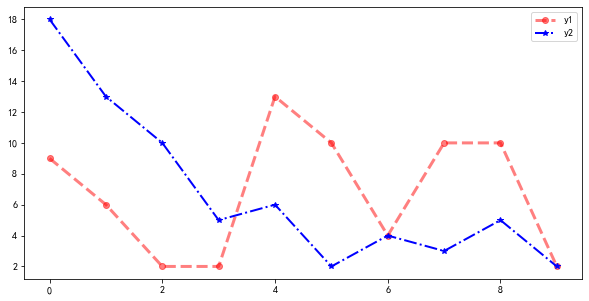

In [26]:
# 画布
plt.figure( figsize=(10,5) )

x = np.arange(10)
y1 = np.random.randint(1,20,10)
y2 = np.random.randint(1,20,10)
y3 = np.random.randint(1,20,10)

# plt.plot(x,y1,'go--')# 点 实线
# plt.plot(x,y2,'rs') # 单点
# plt.plot(x,y3,'go-') # 点 虚线

# o--
plt.plot(x,y1,'o',linestyle='--',color='red',linewidth=3 ,alpha=0.5 ,label='y1') # alpha = float ,透明度
plt.plot(x,y2,'*',ls='-.',color='blue',lw=2 ,label='y2')

plt.legend()
plt.show()

### 
    pip install tushare  
    pip intall  baostock
    拉点 股票数据作为折线图展示

In [27]:
import tushare as ts

In [28]:
pingan = ts.get_hist_data('601318', start='2018-1-1',end='2021-8-14')

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [29]:
pingan

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2021-08-13,54.28,54.97,54.31,54.00,484718.06,-0.43,-0.79,55.140,54.542,55.235,712457.13,718439.02,724412.42,0.45
2021-08-12,55.73,55.89,54.74,54.64,573069.69,-1.06,-1.90,55.012,54.478,55.504,715995.69,735056.06,729086.72,0.53
2021-08-11,55.73,56.79,55.80,55.44,822020.19,0.07,0.13,54.904,54.329,55.766,770025.93,754549.53,754727.53,0.76
2021-08-10,54.85,55.89,55.73,54.18,763656.44,0.61,1.11,54.464,54.060,55.872,734953.79,756184.08,766907.44,0.70
2021-08-09,53.20,55.86,55.12,53.10,918821.25,1.45,2.70,54.166,53.754,56.070,713863.04,773719.51,754391.49,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-19,65.58,67.27,65.68,65.28,785951.44,0.39,0.60,64.868,64.868,64.868,603236.98,603236.98,603236.98,0.73
2019-02-18,63.90,65.42,65.29,63.78,721361.06,2.04,3.23,64.665,64.665,64.665,557558.37,557558.37,557558.37,0.67
2019-02-15,64.80,65.01,63.25,63.22,534011.50,-1.85,-2.84,64.457,64.457,64.457,502957.47,502957.47,502957.47,0.49


In [42]:
# 存储 平安
pingan.loc[::-1].to_csv('pingan.csv')

In [30]:
import baostock as bs

In [31]:
bs.login()

login success!


In [36]:
rs = bs.query_history_k_data_plus("sh.600000",
    "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST",
    start_date='2017-07-01', end_date='2021-8-14',
    frequency="d", adjustflag="3")
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)

In [38]:
bs.logout()

logout success!


In [39]:
result

,date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST
0,2017-07-03,sh.600000,12.6400,12.6500,12.4700,12.5600,12.6500,38778949,486264672.0000,3,0.137985,1,-0.711456,0
1,2017-07-04,sh.600000,12.5500,12.5800,12.4100,12.5500,12.5600,36659128,458434432.0000,3,0.130442,1,-0.079620,0
2,2017-07-05,sh.600000,12.5000,12.6500,12.4700,12.6200,12.5500,26470507,332542464.0000,3,0.094188,1,0.557767,0
3,2017-07-06,sh.600000,12.6200,12.7200,12.5100,12.6600,12.6200,37414241,471582096.0000,3,0.133129,1,0.316957,0
4,2017-07-07,sh.600000,12.6200,12.6900,12.5500,12.6000,12.6600,24667294,311101536.0000,3,0.087772,1,-0.473929,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,2021-08-09,sh.600000,9.0600,9.2500,9.0500,9.1700,9.0800,37461914,344052120.3700,3,0.127600,1,0.991200,0
1001,2021-08-10,sh.600000,9.1800,9.2300,9.1000,9.2000,9.1700,34370935,314539916.2100,3,0.117100,1,0.327200,0
1002,2021-08-11,sh.600000,9.1800,9.2900,9.1600,9.2100,9.2000,37382098,345067501.8800,3,0.127400,1,0.108700,0
1003,2021-08-12,sh.600000,9.2100,9.2200,9.1600,9.1700,9.2100,22978467,211023249.9600,3,0.078300,1,-0.434300,0


In [43]:
result.to_csv('pufa.csv')

In [56]:
pingan_close = pingan.loc[::-1].close

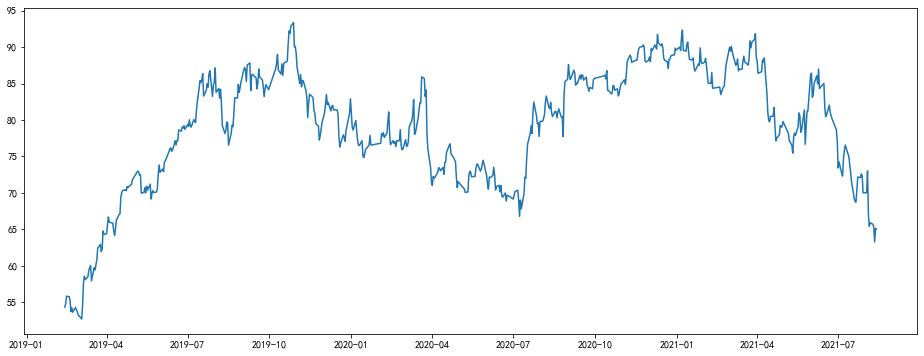

In [66]:
plt.figure(figsize=(16,6))
plt.plot( pd.to_datetime(pingan.index) ,pingan_close.values  )

In [64]:
pingan.index[::50]

Index(['2021-08-13', '2021-06-03', '2021-03-19', '2020-12-31', '2020-10-22',
       '2020-08-05', '2020-05-25', '2020-03-10', '2019-12-20', '2019-10-11',
       '2019-07-25', '2019-05-15', '2019-02-28'],
      dtype='object', name='date')

In [60]:
pd.to_datetime(pingan.index)

DatetimeIndex(['2021-08-13', '2021-08-12', '2021-08-11', '2021-08-10',
               '2021-08-09', '2021-08-06', '2021-08-05', '2021-08-04',
               '2021-08-03', '2021-08-02',
               ...
               '2019-02-26', '2019-02-25', '2019-02-22', '2019-02-21',
               '2019-02-20', '2019-02-19', '2019-02-18', '2019-02-15',
               '2019-02-14', '2019-02-13'],
              dtype='datetime64[ns]', name='date', length=612, freq=None)

In [76]:
# 浦发
pd.to_datetime(result.date)

0      2017-07-03
1      2017-07-04
2      2017-07-05
3      2017-07-06
4      2017-07-07
          ...    
1000   2021-08-09
1001   2021-08-10
1002   2021-08-11
1003   2021-08-12
1004   2021-08-13
Name: date, Length: 1005, dtype: datetime64[ns]

In [81]:

from dateutil.parser import parse
result.date.apply(parse)

0      2017-07-03
1      2017-07-04
2      2017-07-05
3      2017-07-06
4      2017-07-07
          ...    
1000   2021-08-09
1001   2021-08-10
1002   2021-08-11
1003   2021-08-12
1004   2021-08-13
Name: date, Length: 1005, dtype: datetime64[ns]

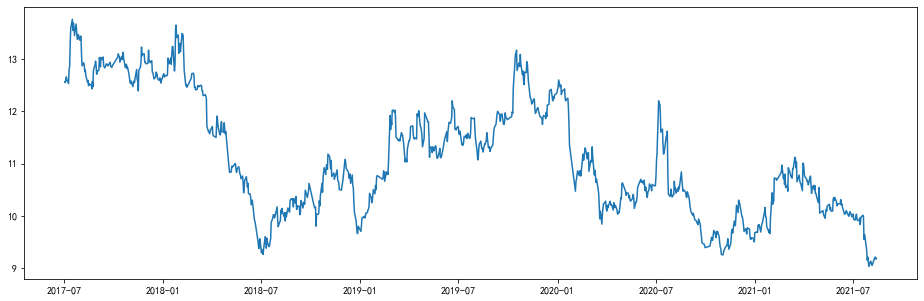

In [93]:
# 浦发 画 date 为x轴， close 为 y轴
plt.figure(figsize=(16,5))

plt.plot(pd.to_datetime(result.date).values , result.close.astype(float).values) 
plt.show()

In [84]:
pd.to_datetime(result.date).values

array(['2017-07-03T00:00:00.000000000', '2017-07-04T00:00:00.000000000',
       '2017-07-05T00:00:00.000000000', ...,
       '2021-08-11T00:00:00.000000000', '2021-08-12T00:00:00.000000000',
       '2021-08-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [91]:
result.close.astype(float).values

array([12.56, 12.55, 12.62, ...,  9.21,  9.17,  9.18])

###  2、柱状图
    plt.bar(x, height, width=0.8, align='center', **kwargs)
        x  ： x轴数据
        height ： y轴数据
        width : 柱子宽度
        align ： {'center', 'edge'}
        
       kwargs：
           color = 颜色
           hatch: {'/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*'}  填充

In [95]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [97]:
y1

array([ 9,  6,  2,  2, 13, 10,  4, 10, 10,  2])

<BarContainer object of 10 artists>

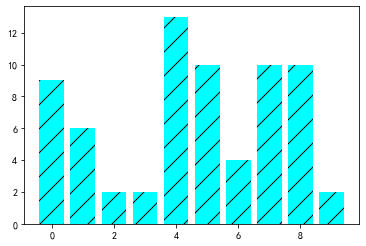

In [119]:
plt.bar(x , y1 ,width=0.8 ,align='center',color='cyan', hatch='/')

### 3、水平柱状图
    plt.barh()

Text(0, 0.5, 'yyyyy')

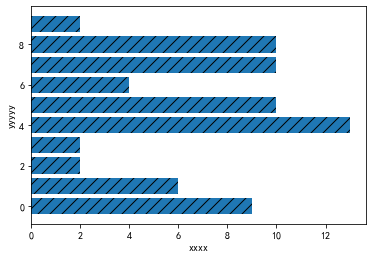

In [156]:
plt.barh(x,y1 ,hatch='//')
plt.xlabel('xxxx')
plt.ylabel('yyyyy')

### 4、直方图
    自带分箱功能
    plt.hist( 数据 ,bins  , histtype='bar' ,rwidth = 0.8 )

In [128]:
# 假设统计 100 人的年龄 ，每10岁做一个区间 画图
ages = np.random.randint(6,95, 100)
ages

array([89, 21, 80, 72, 83, 32, 83, 56, 22, 34, 92, 47, 10, 92, 51, 78, 94,
       70, 29, 60, 49, 57, 91, 68, 86, 49, 86, 77, 53, 86, 91, 91, 55, 44,
       50, 40, 94, 38, 32, 81, 28, 54, 45, 15, 93, 93, 39, 86, 44, 21, 60,
       66, 94, 60, 36, 23,  9, 12, 77, 40, 85, 80, 55, 50, 88,  8, 84, 68,
        9, 89, 19, 32, 14, 53, 69, 44, 66, 77, 46,  7, 25, 69, 62, 59, 50,
       11, 51,  9, 65, 46, 54, 15, 76, 52, 44, 45, 10, 69, 14, 70])

In [132]:
ages_count = pd.value_counts(ages, bins=range(0,101,10) ,sort=False)
ages_count


(-0.001, 10.0]     7
(10.0, 20.0]       7
(20.0, 30.0]       7
(30.0, 40.0]       9
(40.0, 50.0]      14
(50.0, 60.0]      15
(60.0, 70.0]      11
(70.0, 80.0]       8
(80.0, 90.0]      12
(90.0, 100.0]     10
dtype: int64

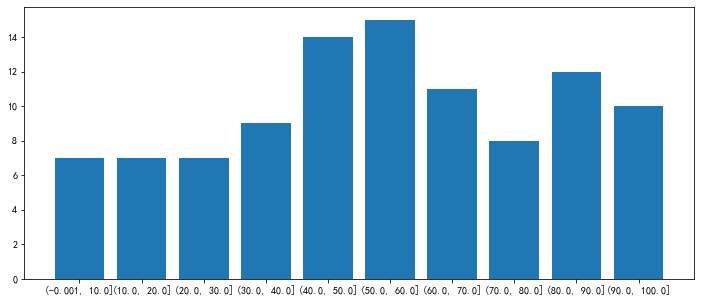

In [138]:
plt.figure(figsize=(12,5))
plt.bar( range(0,10) , ages_count.values  ,align='center')
plt.xticks(range(0,10) ,ages_count.index)
plt.show()

- 直接使用直方图

(array([ 5.,  9.,  7.,  7., 13., 15., 12.,  8., 14., 10.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 <BarContainer object of 10 artists>)

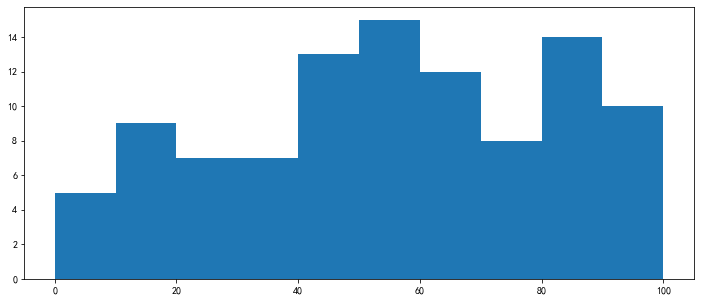

In [143]:
plt.figure(figsize=(12,5))
plt.hist(ages , bins = range(0,101,10))
# 下面美化

- 美化
    在途中 加文字的 语法
       plt.text(x,y ,str)

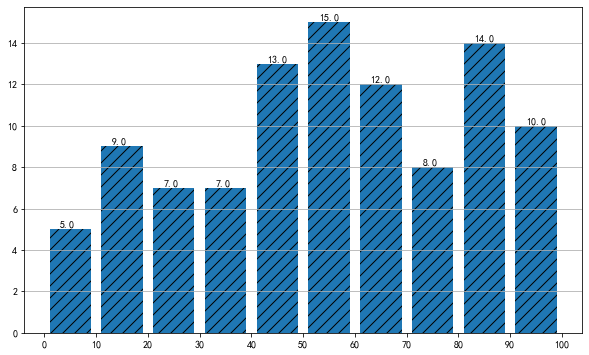

In [154]:
plt.figure(figsize=(10,6))
# 接收 状图的 返回值
y_arr,x_arr,zhuzimen = plt.hist(ages , bins = range(0,101,10),rwidth=0.8 ,hatch='//')
plt.xticks( range(0,101,10))
plt.grid(axis='y')

for i in range(len(zhuzimen)):
    plt.text( x_arr[i] +3 ,y_arr[i]+0.1 ,y_arr[i] )

###  5、饼图
    plt.pie( )

In [158]:
# 日常生活
activity = '干饭-学习-放松-睡觉'.split('-')
slices = [2,10,4,8]

In [160]:
import matplotlib
matplotlib.__version__

'3.3.4'

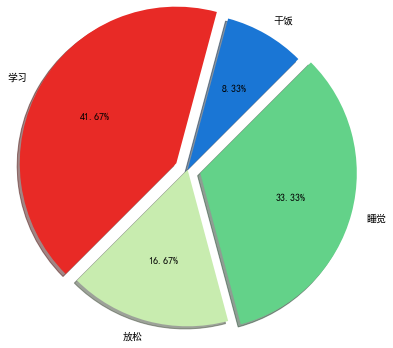

In [191]:
plt.figure( figsize=(10,6)  )

plt.pie(slices ,
        labels = activity,
        explode = [0,0.1,0,0.1] , # 每个扇形 '炸' 出的距离， 以半径为参考
        colors = getColor(4), # 颜色列表 ，可以不改
        startangle=45 , # 起始画的 角度
        autopct= '%.2f%%', # 自动百分比
        labeldistance = 1.1 , # 图例到圆心的距离
        pctdistance = 0.6 ,# 百分比到圆心的距离
        radius = 1.2 ,# 半径比例
        shadow = True # 是否显示阴影 ，立体感
       )

plt.show()

### 6、散点图
    查看数据关系与分布情况
    
    plt.scatter( x , y, label='' ,color=None ,
            s = 40, # 点的大小
            marker = 'o' # 点的形状
    )
    点的形状： https://matplotlib.org/stable/api/markers_api.html?highlight=marker#module-matplotlib.markers
  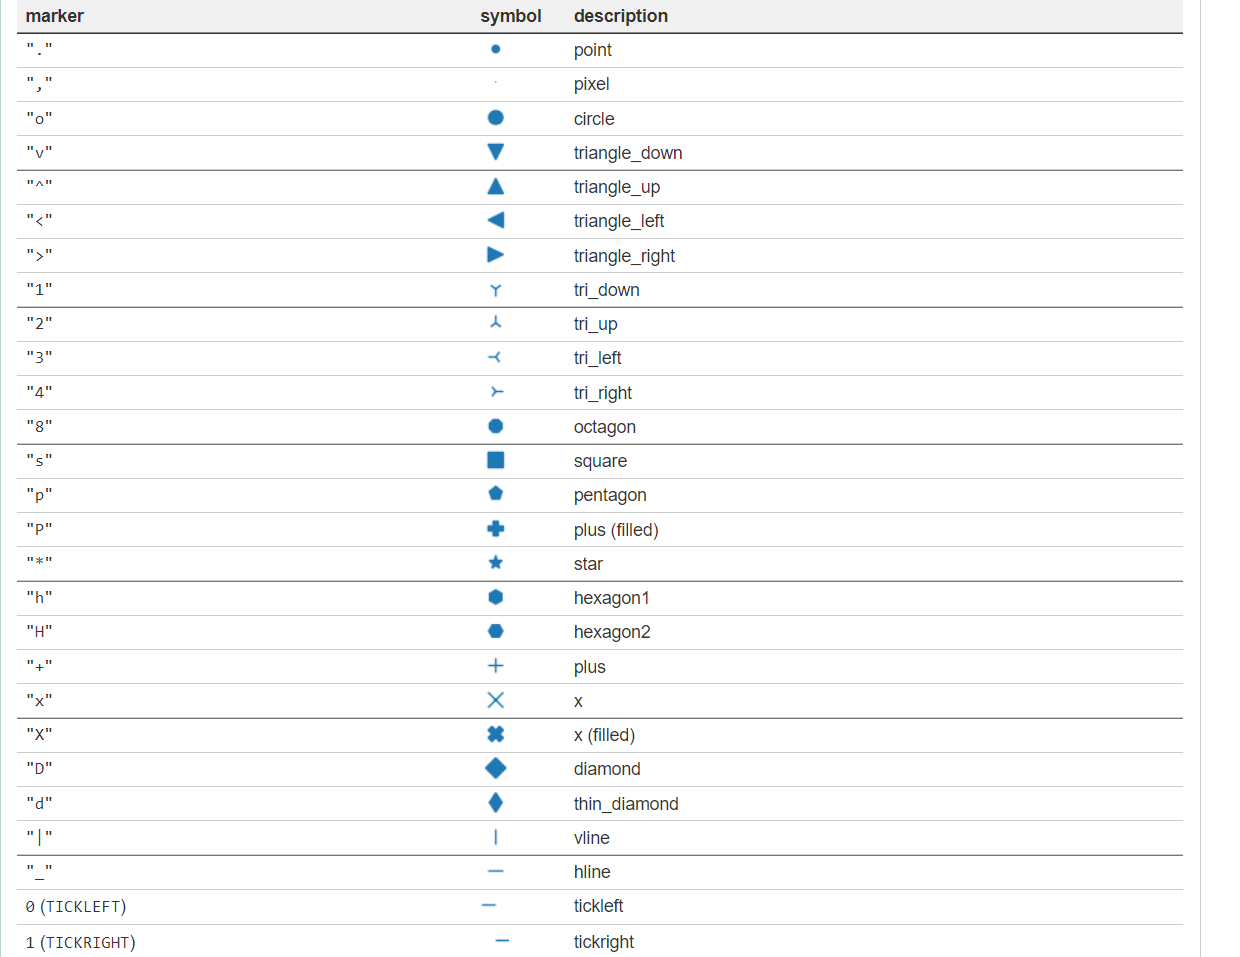

In [202]:
x = np.random.randn(500)
y = np.random.uniform(10,40,500)

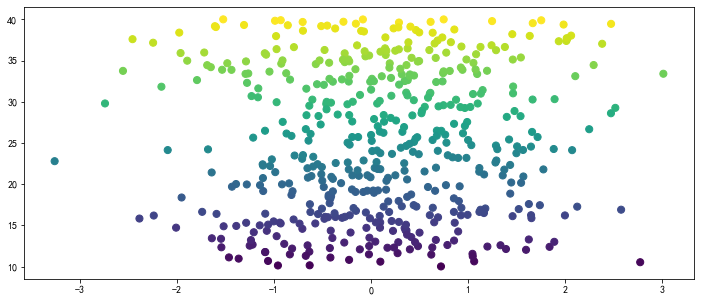

In [215]:
plt.figure(figsize=(12,5))

plt.scatter(x,y ,c= y  ,
           label='散点图',
            s = 50,
#             color = getColor(),
            marker='o'
           )

###  7、堆叠图
    plt.stackplot( x , 
            *args, # n个y值
            labels = (), # 与 y个数相同
            colors= None
            )

In [216]:
# 准备一个 一周 每天 活动画的时间
activity = ['吃饭','学习','放松','睡觉']
data = DataFrame(
            np.random.randint(3,8 , (5,3)),
            index = '周一/周二/周三/周四/周五'.split('/'),
            columns=activity[:-1]
        )

data['睡觉'] = 24 - data.sum(axis=1)
data

,吃饭,学习,放松,睡觉
周一,5,4,7,8
周二,5,5,4,10
周三,4,4,3,13
周四,7,3,6,8
周五,4,6,3,11


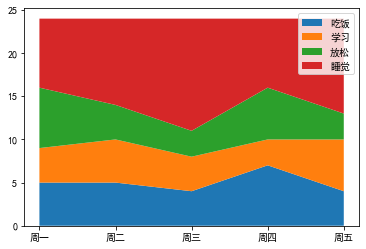

In [219]:
plt.stackplot( data.index ,
             data.吃饭,
             data.学习,
              data.放松,
              data.睡觉,
              
              labels = activity
             )
plt.legend()
plt.show()

<AxesSubplot:>

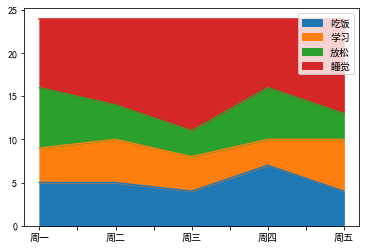

In [221]:
# dataframe 直接画图
data.plot(kind='area')